# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives

***Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

#### 1.1. Importing Libraries

In [1]:
# Import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt

#### 1.2.  Loading the data

In [2]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.


**2.1. Exploring your data** 


In [3]:
# Take a look at the first 5 rows
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [4]:
# shape of dataset
properties.shape

(351, 49)

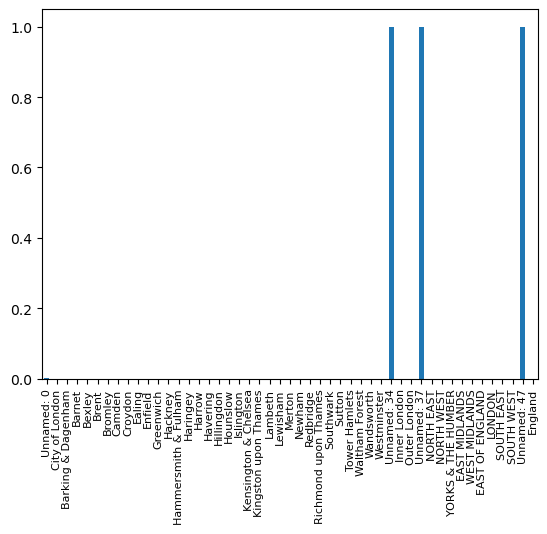

In [5]:
# Proportion of NAs in each column
properties.isna().mean().plot(kind = 'bar')
plt.tick_params(axis='x', labelsize=8)

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).


In [6]:
# transpose properties
properties_trans = properties.transpose()
properties_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,1995-09-01 00:00:00,...,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00
City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,104473.1096,...,908706,949405,926416,870778,842312,856352,819330,761923,741778,808976
Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,51471.61353,...,343427,340643,338661,339060,337543,337374,343251,343546,332825,328226
Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,93273.12245,...,578865,575107,577705,584405,587969,582780,582289,582169,581127,583647
Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,64509.54767,...,399512,396601,398583,397883,399129,394539,400552,395485,396152,391250


In [7]:
# index of transposed properties
properties_trans.index

Index(['Unnamed: 0', 'City of London', 'Barking & Dagenham', 'Barnet',
       'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark',
       'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth',
       'Westminster', 'Unnamed: 34', 'Inner London', 'Outer London',
       'Unnamed: 37', 'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER',
       'EAST MIDLANDS', 'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON',
       'SOUTH EAST', 'SOUTH WEST', 'Unnamed: 47', 'England'],
      dtype='object')

In [8]:
# reset the index
properties_trans = properties_trans.reset_index()

In [9]:
properties_trans.head()

,index,0,1,2,3,4,5,6,7,8,...,341,342,343,344,345,346,347,348,349,350
0,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,908706,949405,926416,870778,842312,856352,819330,761923,741778,808976
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,343427,340643,338661,339060,337543,337374,343251,343546,332825,328226
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,578865,575107,577705,584405,587969,582780,582289,582169,581127,583647
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,399512,396601,398583,397883,399129,394539,400552,395485,396152,391250


In [10]:
# Assign the first row to column headings
properties_trans.columns = properties_trans.iloc[0]

In [11]:
properties_trans = properties_trans.drop(properties_trans.index[0])
properties_trans.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,908706,949405,926416,870778,842312,856352,819330,761923,741778,808976
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,343427,340643,338661,339060,337543,337374,343251,343546,332825,328226
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,578865,575107,577705,584405,587969,582780,582289,582169,581127,583647
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,399512,396601,398583,397883,399129,394539,400552,395485,396152,391250
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,512558,514625,507636,524518,526846,529493,520825,519921,526581,521609


**2.3. Cleaning the data (part 2)**

We have to **rename** a couple columns.

In [12]:
properties_trans = properties_trans.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

In [13]:
properties_trans.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2023-05-01 00:00:00,2023-06-01 00:00:00,2023-07-01 00:00:00,2023-08-01 00:00:00,2023-09-01 00:00:00,2023-10-01 00:00:00,2023-11-01 00:00:00,2023-12-01 00:00:00,2024-01-01 00:00:00,2024-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,908706,949405,926416,870778,842312,856352,819330,761923,741778,808976
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,343427,340643,338661,339060,337543,337374,343251,343546,332825,328226
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,578865,575107,577705,584405,587969,582780,582289,582169,581127,583647
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,399512,396601,398583,397883,399129,394539,400552,395485,396152,391250
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,512558,514625,507636,524518,526846,529493,520825,519921,526581,521609


In [14]:
properties_trans.columns

Index([   'London_Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2023-05-01 00:00:00, 2023-06-01 00:00:00, 2023-07-01 00:00:00,
       2023-08-01 00:00:00, 2023-09-01 00:00:00, 2023-10-01 00:00:00,
       2023-11-01 00:00:00, 2023-12-01 00:00:00, 2024-01-01 00:00:00,
       2024-02-01 00:00:00],
      dtype='object', name=0, length=352)

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [15]:
# Converting dataset wide to long form using melt
df_properties = pd.melt(properties_trans, id_vars = ['London_Borough', 'ID'])

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [16]:
df_properties.head()

,London_Borough,ID,0,value
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


In [17]:
df_properties = df_properties.rename(columns = {0:'Month', 'value':'Avg_Price'})

In [18]:
df_properties.head()

,London_Borough,ID,Month,Avg_Price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.2266
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [19]:
df_properties['London_Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 34',
       'Inner London', 'Outer London', 'Unnamed: 37', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 47', 'England'], dtype=object)

As we've seen in Section 2.1, all of the values of 'Unnamed: 34', 'Unnamed: 37', and 'Unnamed: 47' are NaN. In addition, some of the elements of London_Borough, such as the NORTH EAST, NORTH WEST, YORKS & THE HUMBER, EAST MIDLANDS, WEST MIDLANDS, EAST OF ENGLAND, LONDON, SOUTH EAST, SOUTH WEST, and ENGLAND, do not belong to the actual London Borough.

Firstly, let's deal with the Unnamed three.

In [20]:
df_properties[df_properties['London_Borough'] == 'Unnamed: 34'].head()

,London_Borough,ID,Month,Avg_Price
33,Unnamed: 34,NaN,1995-01-01 00:00:00,NaN
81,Unnamed: 34,NaN,1995-02-01 00:00:00,NaN
129,Unnamed: 34,NaN,1995-03-01 00:00:00,NaN
177,Unnamed: 34,NaN,1995-04-01 00:00:00,NaN
225,Unnamed: 34,NaN,1995-05-01 00:00:00,NaN


In [21]:
df_properties[df_properties['London_Borough'] == 'Unnamed: 37'].head()

,London_Borough,ID,Month,Avg_Price
36,Unnamed: 37,NaN,1995-01-01 00:00:00,NaN
84,Unnamed: 37,NaN,1995-02-01 00:00:00,NaN
132,Unnamed: 37,NaN,1995-03-01 00:00:00,NaN
180,Unnamed: 37,NaN,1995-04-01 00:00:00,NaN
228,Unnamed: 37,NaN,1995-05-01 00:00:00,NaN


In [22]:
df_properties[df_properties['London_Borough'] == 'Unnamed: 47'].head()

,London_Borough,ID,Month,Avg_Price
46,Unnamed: 47,NaN,1995-01-01 00:00:00,NaN
94,Unnamed: 47,NaN,1995-02-01 00:00:00,NaN
142,Unnamed: 47,NaN,1995-03-01 00:00:00,NaN
190,Unnamed: 47,NaN,1995-04-01 00:00:00,NaN
238,Unnamed: 47,NaN,1995-05-01 00:00:00,NaN


In [23]:
# Remove the three Unnammed
df_properties = df_properties.dropna()

Now, we're removing the other problematic elements of London_Borough besides the Unnamed's. Since the London_Borough contains non boroughs, we have to exclude the rows from the dataset.

In [24]:
Non_Borough = ['NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS', 'WEST MIDLANDS', \
               'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 'SOUTH WEST', 'England'] 

In [25]:
# Remove the Non_Brough rows from dataset
df_properties = df_properties[~df_properties['London_Borough'].isin(Non_Borough)]
df_properties[df_properties['London_Borough'].isin(Non_Borough)]

,London_Borough,ID,Month,Avg_Price


Additionally, let's check the data type of each column.

In [26]:
df_properties.dtypes

London_Borough    object
ID                object
Month             object
Avg_Price         object
dtype: object

In [27]:
# Converting th data type of Avg_Price to numeric
df_properties['Avg_Price'] = pd.to_numeric(df_properties['Avg_Price'])

In [28]:
df_properties.dtypes

London_Borough     object
ID                 object
Month              object
Avg_Price         float64
dtype: object

**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [29]:
df_properties['Year'] = df_properties['Month'].apply(lambda x: x.year)
df_properties.head()

,London_Borough,ID,Month,Avg_Price,Year
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487,1995
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660,1995
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832,1995
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036,1995
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698,1995


**3. Modeling**

Let's create a function that will calculate a change rate of house prices, comparing the price of a house in 2018 to the price in 1998.

In [30]:
def create_price_change_rate(df, borough):
    
    df_annual_average = df.groupby(by = ['London_Borough', 'Year'])['Avg_Price'].mean()
    Price_1998 = df_annual_average.loc[(borough, 1998)]
    Price_2018 = df_annual_average.loc[(borough, 2018)]
    Price_Change_Rate = (Price_2018 / Price_1998 - 1) * 100
    
    return [borough, Price_Change_Rate]

In [31]:
Borough_List = list(df_properties['London_Borough'].unique())

price_change_rates = []

for borough in Borough_List:
    price_change_rate = create_price_change_rate(df_properties, borough)
    price_change_rates.append(price_change_rate)

df_rates = pd.DataFrame(price_change_rates, columns = ['Borough', "Price_Change_Rate"])

In [32]:
# sort the data set
df_rates_sorted = df_rates.sort_values(by = 'Price_Change_Rate')

Text(0.5, 0, 'Price Change (%)')

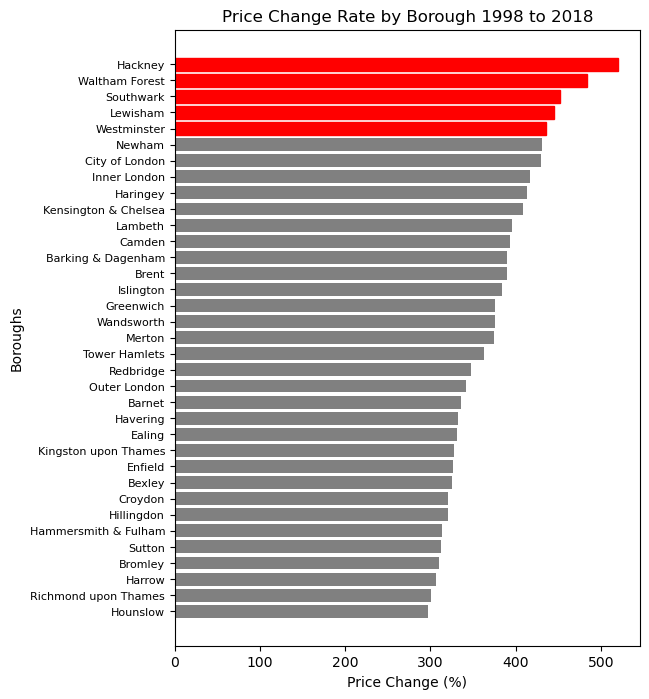

In [33]:
# reindex
df_rates_sorted.reset_index(drop=True, inplace=True)

plt.figure(figsize=(6, 8))
bar_chart = plt.barh(df_rates_sorted['Borough'], df_rates_sorted['Price_Change_Rate'], color = 'grey')
plt.tick_params(axis='y', labelsize=8)

# Color the top five bar with red
for i in range(30, 35):
    bar_chart[i].set_color('red')

plt.title('Price Change Rate by Borough 1998 to 2018')
plt.ylabel('Boroughs')
plt.xlabel('Price Change (%)')

### 4. Conclusion

The Top5 boroughs of London, shown the greated increase in housing prices on average over the last two decades are Hackney, Waltham Forest, Southwark, Lewisham, and Westminster.
